# Object Detection Exercise - Solution

Welcome to this object-detection exercise. 

The page you have just joined is an integrated development environment for python. We will be using it for this session's code along. Jupyter allows you to write code and use markdowns in a very convenient and interable format. 


**Ressources:**

The below are the paths to all the files that will be used throughout this tutorial:
 * The .jpeg files are example images that you can use. If you prefer you can upload your own photo to the data folder and enter your file name below (I recommend trying this at home!)


In [1]:
# Images
face_example = '../data/face_detection_example.jpg'

your_file_name = ''
your_face = '../data/{}'.format(your_file_name)

# Algorithms

face_detection = '../data/haarcascade_frontalface_default.xml'
eye_detection = '../data/haarcascade_eye.xml'

**To get started, let's install the required libraries:**

In [2]:
# !pip install numpy
# !pip install matplotlib
# !pip install opencv-python

**Now let's import them!**

In [3]:
import numpy as np
import cv2 as cv

from breakfast_ressources import *
%matplotlib inline

First things first, let's define a variable **img** to store our image!

In [4]:
# To load an image we use the load method present in the OpenCV library. It can be called by writing cv.imread()
img = cv.imread(face_example)


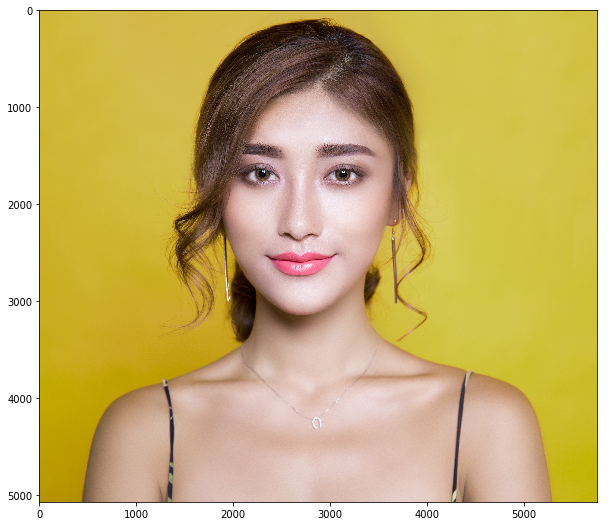

In [5]:
# I've predefined a little function to display images in a friendly format! Just pass the img variable to show_image()
show_image(img)

**Defining our classifier:**

- First, let's define our classifier. A binary classifier is an algorithm that only considers two outputs, i.e. yes or no, win or lose, face or no face.  
- To define the type of classification we want to accomplish, we need to load the appropriate model, face detection and eye detection. 

In [6]:
face_cascade = cv.CascadeClassifier(face_detection)
eye_cascade = cv.CascadeClassifier(eye_detection)

Our classifier is now loaded. We'll first start by detecting the faces! This will make detecting the eyes much faster.

In [7]:
# In order to detect in our image, we use the detectMultiScale(image, scaleFactor, minNeighbors) method. 
# Detected objects are returned as a list of rectangles. Let's create a variable to store them!
faces = face_cascade.detectMultiScale(img, 1.3, 5)

In [8]:
# Let's print face
print(faces)

[[1665  840 2207 2207]]


The above should be the coordinates of the rectangle entangling the face (the first two values represent coordinates, the latter represent width and length). 

We can also notice that our variable faces is a list of list (think of this as a container for different face coordinates). This means that the face variable is of the following format: [rectangle1_cooridnates, rectangle2_coordinates, etc.] 

In our scenario, this isn't very consequential as we only have one set of coordinates. But for consistency purposes we will assume that several faces can be detected. As such, when we draw our rectangles, we must iterate over the variable using a for loop.

In [9]:
# In order to draw a rectangle, we use OpenCV's method cv.rectangle(img, pt1, pt2, color, thickness)
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 20)

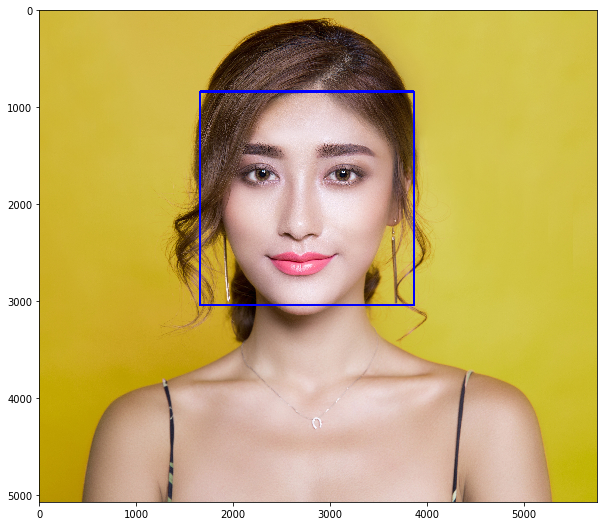

In [10]:
# Let's look at our image now!
show_image(img)

Now that we've identified the face, let's identify the eyes. In order to do that, we crop our image to show us the only region of interest 

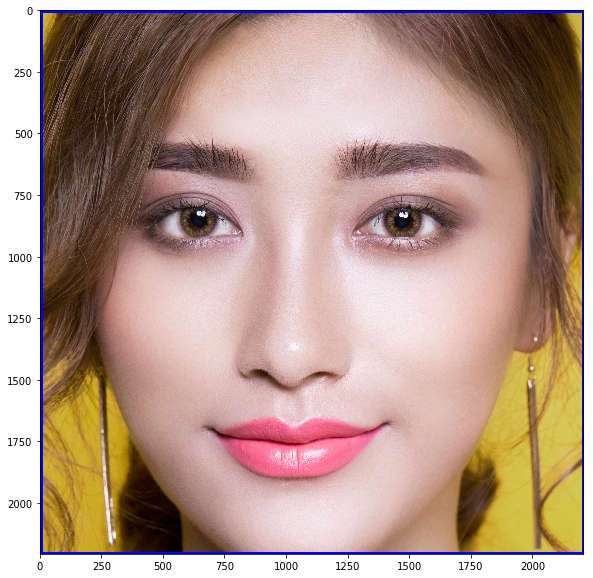

In [11]:
## Let's store our region of interest in two new variables roi_color and roi_gray
roi = img[y:(y+h), x:(x+w)]

show_image(roi)

Not what we've defined our region of interest, let's detect the eyes

In [12]:
eyes = eye_cascade.detectMultiScale(roi, 1.2, 8)
print(eyes)

[[ 377  621  464  464]
 [1216  603  499  499]]


Similarily to previously described, several items are recorded within out eyes variables. We must use a for loop again in order to draw both rectangles.

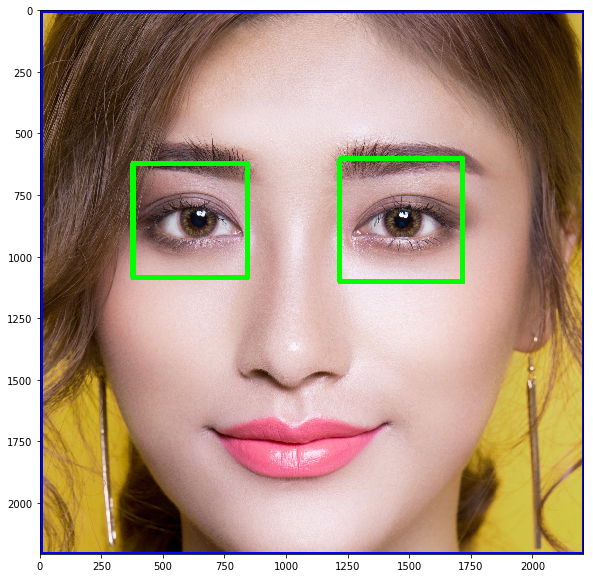

In [13]:
# In the same way as for the face component, we use OpenCV's method cv.rectangle(img, pt1, pt2, color, thickness)

for (ex,ey,ew,eh) in eyes:
    cv.rectangle(roi, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 20)
    
show_image(roi)

Let's look at the final result

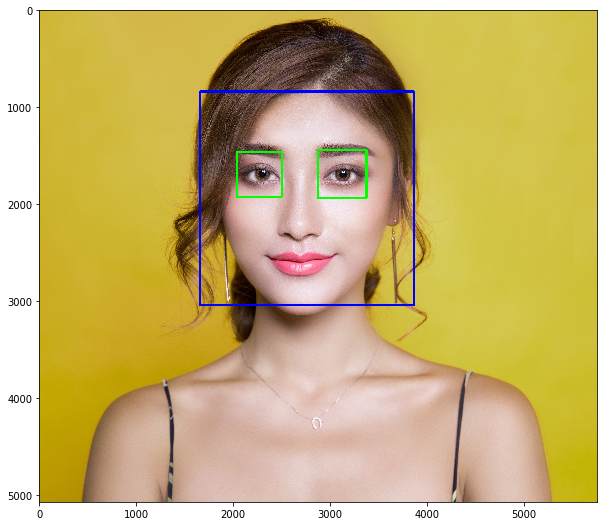

In [14]:
show_image(img)

Congratulations! You should have successfuly detected the face in the picure. We hope you enjoyed this session and feel like a true AI master.

**[BONUS] Can you combine face and eye detection into one step?**

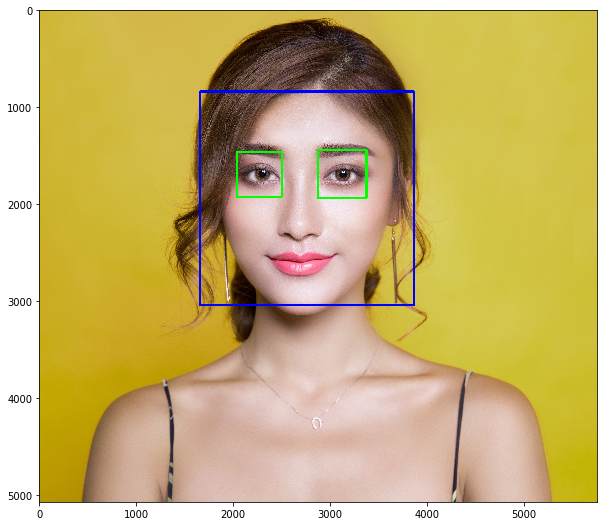

In [15]:
img = cv.imread(face_example)

# ENTER YOUR CODE HERE
faces = face_cascade.detectMultiScale(img, 1.3, 5)
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 20)
    roi = img[y:(y+h), x:(x+w)]
    
    eyes = eye_cascade.detectMultiScale(roi, 1.2, 8)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 20)

show_image(img)

**How can I recreate this at home?**

If you would like to recreate this exercise at home, the process is very simple! Simply go to https://mybinder.org/ and load the repository https://github.com/maximemerabet/ds_breakfast as shown below:

![img](./my_binder.png)